In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train['source'] = 'train'
test['source'] = 'test'

In [5]:
data = pd.concat([train, test],ignore_index=False)

/home/prathamesh/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [6]:
data.head()

,ID,age,black,chas,crim,dis,indus,lstat,medv,nox,ptratio,rad,rm,source,tax,zn
0,1,65.2,396.90,0,0.00632,4.0900,2.31,4.98,24.0,0.538,15.3,1,6.575,train,296,18.0
1,2,78.9,396.90,0,0.02731,4.9671,7.07,9.14,21.6,0.469,17.8,2,6.421,train,242,0.0
2,4,45.8,394.63,0,0.03237,6.0622,2.18,2.94,33.4,0.458,18.7,3,6.998,train,222,0.0
3,5,54.2,396.90,0,0.06905,6.0622,2.18,5.33,36.2,0.458,18.7,3,7.147,train,222,0.0
4,7,66.6,395.60,0,0.08829,5.5605,7.87,12.43,22.9,0.524,15.2,5,6.012,train,311,12.5


In [7]:
data.apply(lambda x: sum(x.isnull()))

ID           0
age          0
black        0
chas         0
crim         0
dis          0
indus        0
lstat        0
medv       173
nox          0
ptratio      0
rad          0
rm           0
source       0
tax          0
zn           0
dtype: int64

In [8]:
data.describe()

,ID,age,black,chas,crim,dis,indus,lstat,medv,nox,ptratio,rad,rm,tax,zn
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,333.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,253.500000,68.574901,356.674032,0.069170,3.613524,3.795043,11.136779,12.653063,22.768769,0.554695,18.455534,9.549407,6.284634,408.237154,11.363636
std,146.213884,28.148861,91.294864,0.253994,8.601545,2.105710,6.860353,7.141062,9.173468,0.115878,2.164946,8.707259,0.702617,168.537116,23.322453
min,1.000000,2.900000,0.320000,0.000000,0.006320,1.129600,0.460000,1.730000,5.000000,0.385000,12.600000,1.000000,3.561000,187.000000,0.000000
25%,127.250000,45.025000,375.377500,0.000000,0.082045,2.100175,5.190000,6.950000,17.400000,0.449000,17.400000,4.000000,5.885500,279.000000,0.000000
50%,253.500000,77.500000,391.440000,0.000000,0.256510,3.207450,9.690000,11.360000,21.600000,0.538000,19.050000,5.000000,6.208500,330.000000,0.000000
75%,379.750000,94.075000,396.225000,0.000000,3.677082,5.188425,18.100000,16.955000,25.000000,0.624000,20.200000,24.000000,6.623500,666.000000,12.500000
max,506.000000,100.000000,396.900000,1.000000,88.976200,12.126500,27.740000,37.970000,50.000000,0.871000,22.000000,24.000000,8.780000,711.000000,100.000000


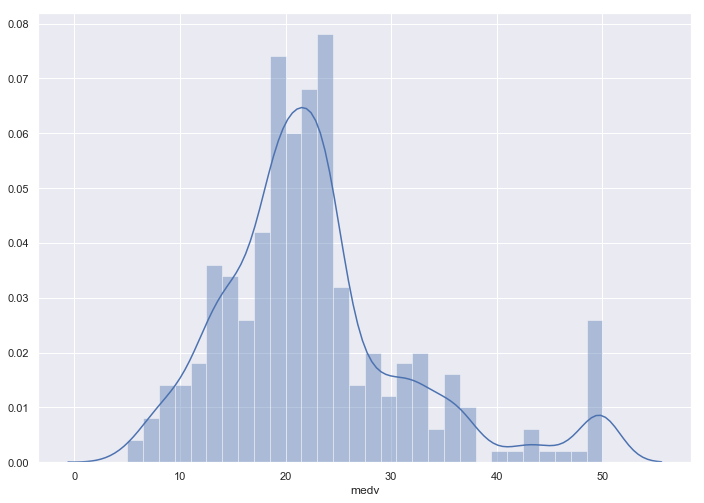

In [9]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(train['medv'], bins=30)

In [10]:
train.drop(columns='source', inplace=True)
test.drop(columns='source', inplace=True)

In [11]:
train.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [12]:
test.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
1,6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
2,8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15
3,9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93
4,10,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10


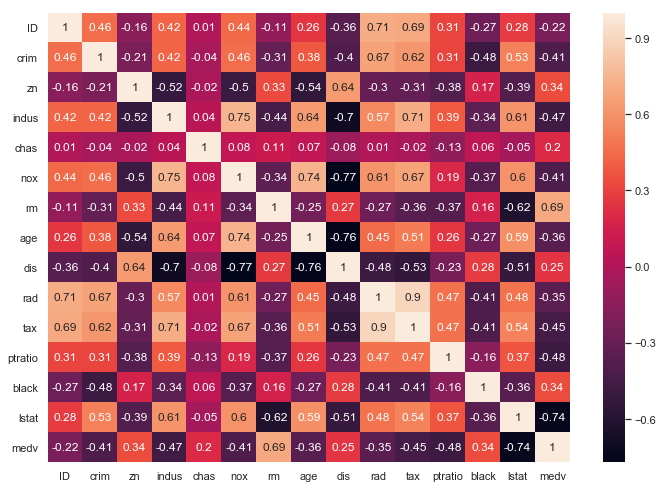

In [13]:
corr_matrix = train.corr().round(2)
sns.heatmap(data=corr_matrix, annot=True)

Text(0,0.5,'medv')

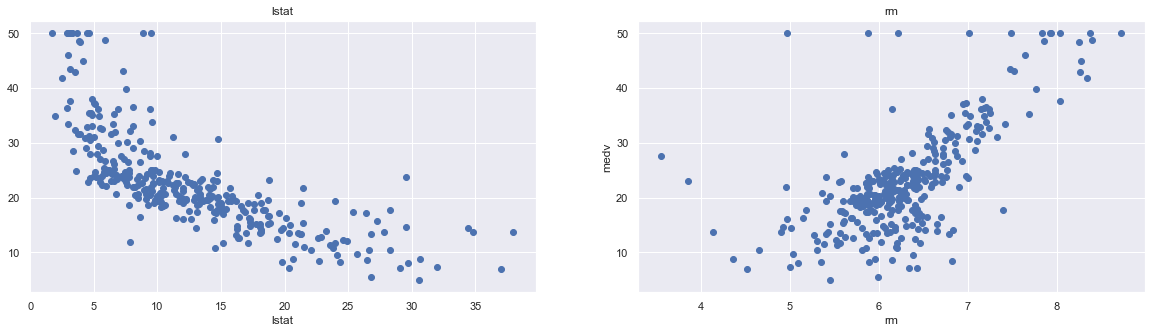

In [14]:
plt.figure(figsize=(20, 5))

features = ['lstat', 'rm']
target = train['medv']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = train[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
plt.ylabel('medv')

In [15]:
X_train = pd.DataFrame(np.c_[train['lstat'], train['rm']], columns=['lstst','rm'])
Y_train = train['medv']
X_test = pd.DataFrame(np.c_[test['lstat'], test['rm']], columns=['lstst','rm'])

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
linreg = LinearRegression()

In [18]:
linreg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [19]:
test['medv'] = linreg.predict(X_test)

In [20]:
#Result
test.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,32.869698
1,6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.374162
2,8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,17.952483
3,9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,8.210255
4,10,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.470109


In [21]:
import pickle
model = pickle.dump(linreg, open('model.pkl', 'wb'))

In [22]:
X_test

,lstst,rm
0,4.03,7.185
1,5.21,6.430
2,19.15,6.172
3,29.93,5.631
4,17.10,6.004
5,14.67,5.990
6,11.28,5.727
7,16.30,5.924
8,16.51,5.599
9,14.81,5.813
